<a href="https://colab.research.google.com/github/jofmorenore/TimeSeries/blob/master/proyecto/2_1_Descriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R 
install.packages("fGarch")
library(fGarch)

## Series simuladas

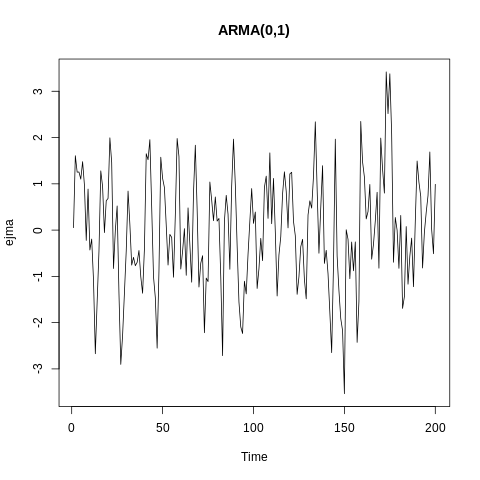

In [3]:
%%R
# Simulación ARMA
set.seed(13)
Tlength=200
ejma=arima.sim(list(order = c(0,0,1),ma=c(0.6)), n = Tlength)
plot(ejma,main='ARMA(0,1)')

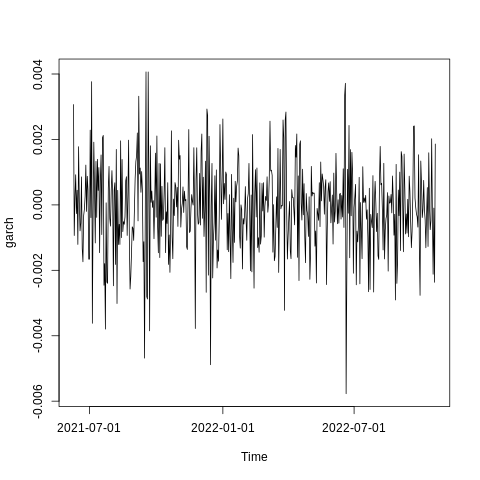

In [4]:
%%R
# Simulación ARCH
set.seed(12)
spec = garchSpec(model = list(alpha = c(0.2, 0.4), beta = 0))
ARCH2=garchSim(spec, n = 500)
plot(ARCH2)

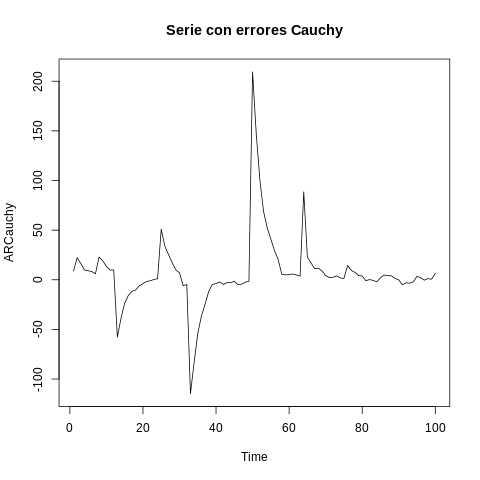

In [5]:
%%R
# Simulación AR(1) con errores Cauchy
set.seed(11)
Tlength=100
ARCauchy=arima.sim(list(order = c(1,0,0),ar = c(0.7)), n = Tlength, rand.gen = rcauchy)
plot(ARCauchy,main='Serie con errores Cauchy')

###Filtro lineal invariante
Se desea simular observaciones que provienen de:

$$X_t=\sum_{j=-k}^{k}a_jZ_{t-j}$$

Note que hay dependencia hasta el rezago $h=2k$.

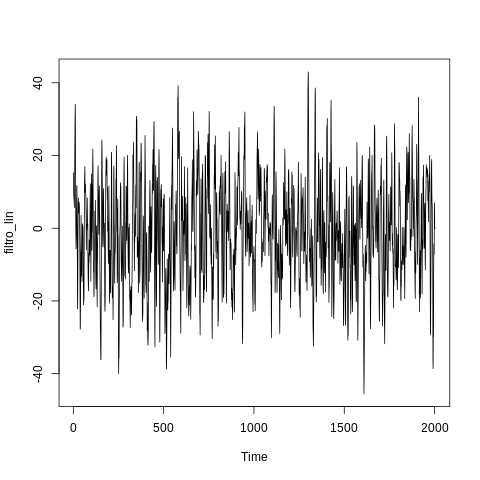

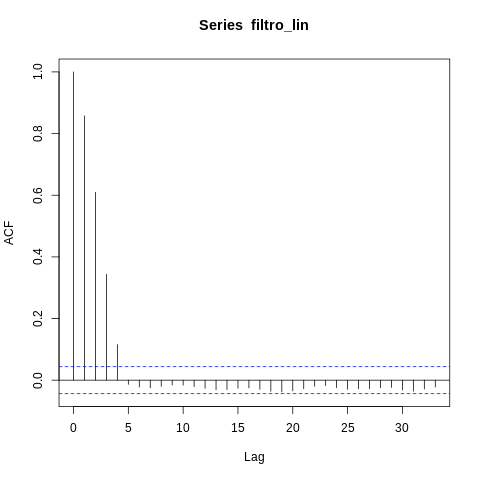

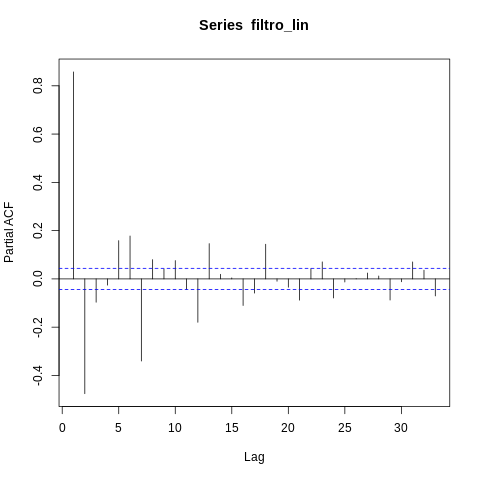

In [6]:
%%R
set.seed(14)
k=2
T=2000+2*k
a=rnorm(2*k+1,5,1)
Zt=rnorm(T,0,1) ##proceso IID
Xt=rep(0,T)

for(t in (k+1):(T-k)){
  Xt[t-k]=a%*%Zt[(t-k):(t+k)]
  }
  
filtro_lin = as.ts(Xt)
plot(filtro_lin)
acf(filtro_lin)
pacf(filtro_lin)

Tarea: Hacer lo mismo para el proceso $X_{t}=A\cos(\theta t)+B\sin(\theta t), \theta\in(-\pi,\pi)$ y $A,B$ variables aleatorias no correlacionadas con medias cero y varianzas 1.

In [ ]:
%%R
install.packages("mvtnorm")
library(mvtnorm)

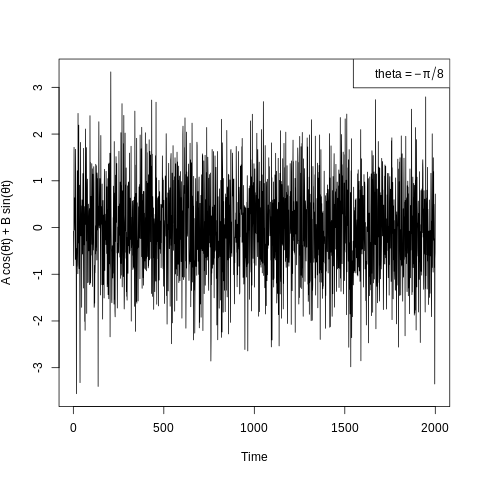

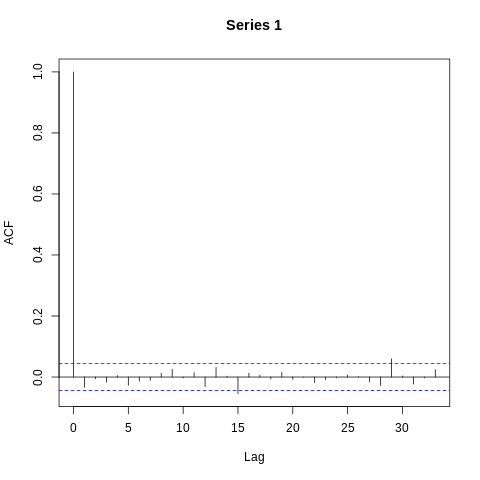

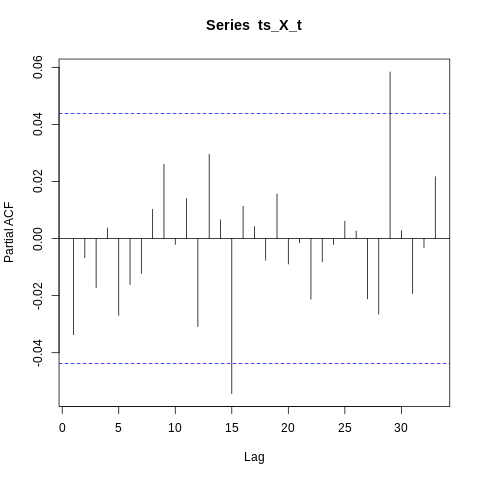

In [8]:
%%R
set.seed(17)
T = 2000
sigma = matrix(c(1,0,0,1), ncol=2)
theta = sample(seq(from=-pi, to = pi, by = pi/8), size = 1)
X_t = mvtnorm::rmvnorm(n=T, mean=c(0,0), sigma=sigma, method="chol")%*%t(cbind(cos(theta*T), sin(theta*T)))
ts_X_t = as.ts(X_t)
plot(ts_X_t, ylab = expression(paste("A cos(",theta,"t) + B sin(", theta,"t)", sep = "")))
legend("topright", legend = c(expression("theta =" -pi/8)))
acf(ts_X_t)
pacf(ts_X_t)

## Caminata aleatoria

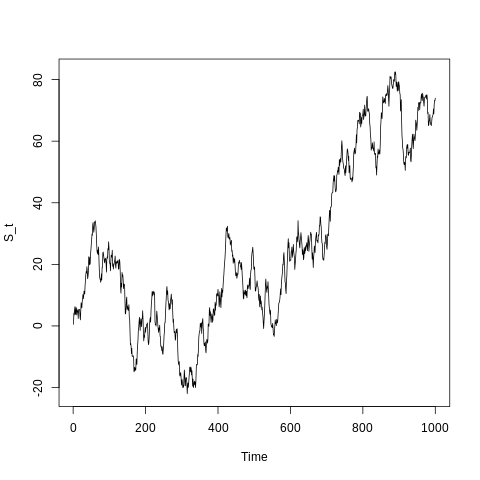

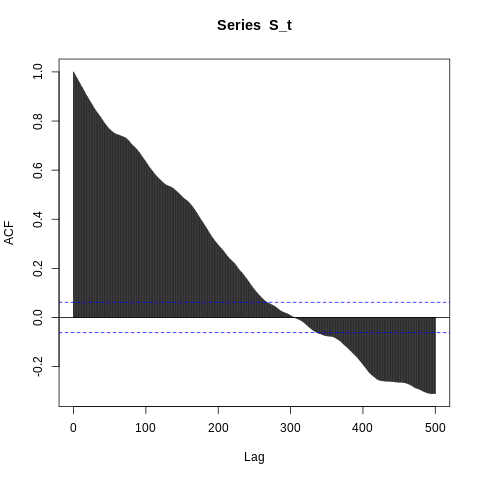

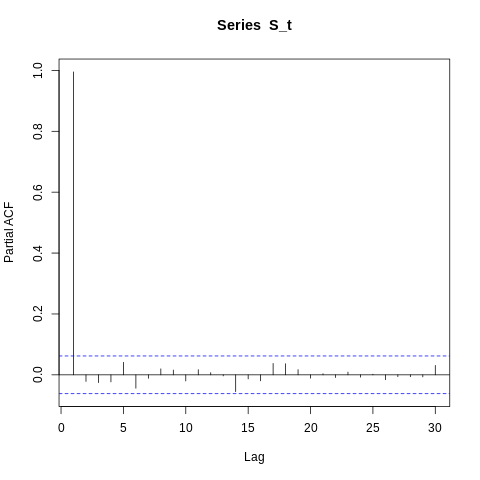

In [9]:
%%R
set.seed(15)
T=1000
sigma=2
X_t=rnorm(T,0,sigma)
S_t=as.ts(cumsum(X_t))
plot(S_t)
acf(S_t,lag.max = 500)
pacf(S_t)

Tarea: Chequear la acf y pacf de sus series, además de la serie de pasajeros data(AirPassengers), todas las series del archivo Base_Accidentes.xlsx de la carpeta base de datos, además de todas las series de la carpeta Estacionarias. Por favor importarlas, crear objetos de series de tiempo.

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf # ols
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.arima.model import ARIMA

In [11]:
data=pd.read_csv(r'https://raw.githubusercontent.com/sacalderonv/TimeSeries/master/Series%20Univariadas/Bases%20de%20Datos/AirPassengers.csv')
data['Month']=pd.to_datetime(data['Month'])
pasajeros=pd.Series(data['NPassengers'].values,data['Month'],name='NPassengers')
pasajeros.index.freq='MS'
pasajeros.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Freq: MS, Name: NPassengers, dtype: int64

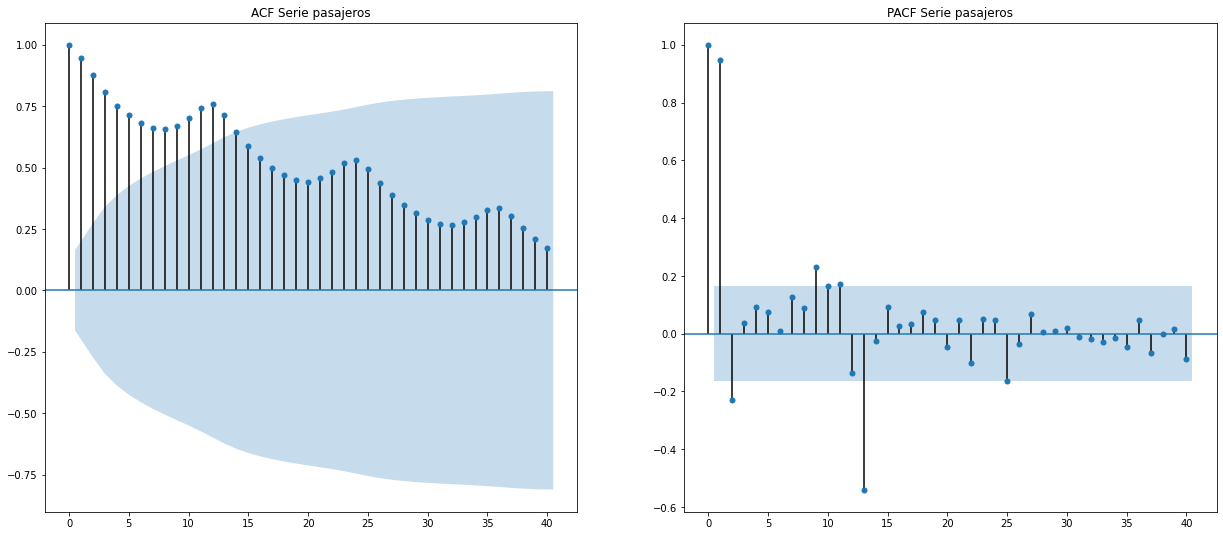

In [12]:
fig, ax = plt.subplots(1,2,figsize=(21,9))

plot_acf(pasajeros, lags=40, ax=ax[0],title='ACF Serie pasajeros')
plot_pacf(pasajeros, lags=40, ax=ax[1],title='PACF Serie pasajeros', method='ywmle').show()

plt.show()

In [13]:
Base_Accidentes=pd.read_excel(r'https://github.com/sacalderonv/TimeSeries/blob/master/Series%20Univariadas/Bases%20de%20Datos/Base_Accidentes.xlsx?raw=true')
Base_Accidentes.head(10)

,PERIODO,MES,ISE,IC,IPI,AUTP,CC,VTP,VC,VEH,...,HER,FAT,URB,RUR,EASTER,TD,HERR,HERU,FATR,FATU
0,2005,1,60.842819,96.015131,73.130942,6779,2584,1704,514,11581,...,3099,429,2808,720,0,20,554,2545,166,263
1,2005,2,58.102236,96.427825,76.057927,7676,3338,1836,811,13661,...,2878,318,2703,493,0,20,391,2487,102,216
2,2005,3,61.605652,97.154694,80.341499,7862,3065,1924,809,13660,...,2893,412,2736,569,0,20,406,2487,163,249
3,2005,4,61.451999,100.029444,83.286585,9102,3309,2145,974,15530,...,3010,400,2841,569,1,21,425,2585,144,256
4,2005,5,62.881086,99.777720,82.145464,9128,3010,2122,914,15174,...,3036,359,2871,524,0,20,419,2617,105,254
5,2005,6,62.213696,99.257910,81.862093,8934,3157,2238,1017,15346,...,2762,410,2628,544,0,21,396,2366,148,262
6,2005,7,62.323030,99.936440,80.295759,8656,2827,2251,1026,14760,...,3122,468,2897,693,0,19,524,2598,169,299
7,2005,8,63.286986,100.391170,85.703585,9258,3087,2371,1071,15787,...,3003,417,2900,520,0,22,393,2610,127,290
8,2005,9,66.124889,101.140357,86.114859,9833,3295,3164,1162,17454,...,2986,384,2859,511,0,22,379,2607,132,252
9,2005,10,66.441413,101.829158,86.464809,9117,3171,3069,1186,16543,...,2982,383,2820,545,0,20,424,2558,121,262
